选择函数
$$
f(x)=e^{-5x}cos(10 \pi x)
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def true_function(x):
    return np.abs(x - 0.5) + np.sin(np.pi * x)

np.random.seed(0)
x_train = np.linspace(0, 1, 100).reshape(-1, 1)
y_train = true_function(x_train)

x_test = np.linspace(0, 1, 100).reshape(-1, 1)
y_test = true_function(x_test)


In [23]:
class TwoLayerReLU_Network:
    def __init__(self, input_size, hidden1, hidden2, output_size, lr=0.01):
        self.lr = lr
        self.W1 = np.random.randn(input_size, hidden1) * 0.1
        self.b1 = np.zeros((1, hidden1))
        self.W2 = np.random.randn(hidden1, hidden2) * 0.1
        self.b2 = np.zeros((1, hidden2))
        self.W3 = np.random.randn(hidden2, output_size) * 0.1
        self.b3 = np.zeros((1, output_size))
    
    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return (x > 0).astype(float)
    
    def forward(self, x):
        self.z1 = x @ self.W1 + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = self.a1 @ self.W2 + self.b2
        self.a2 = self.relu(self.z2)
        self.z3 = self.a2 @ self.W3 + self.b3
        return self.z3

    def backward(self, x, y, y_pred):
        loss_grad = 2 * (y_pred - y) / len(y)

        dW3 = self.a2.T @ loss_grad
        db3 = np.sum(loss_grad, axis=0, keepdims=True)

        da2 = loss_grad @ self.W3.T
        dz2 = da2 * self.relu_derivative(self.z2)
        dW2 = self.a1.T @ dz2
        db2 = np.sum(dz2, axis=0, keepdims=True)

        da1 = dz2 @ self.W2.T
        dz1 = da1 * self.relu_derivative(self.z1)
        dW1 = x.T @ dz1
        db1 = np.sum(dz1, axis=0, keepdims=True)

        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
        self.W3 -= self.lr * dW3
        self.b3 -= self.lr * db3

    def train(self, x, y, epochs=8000):
        for i in range(epochs):
            y_pred = self.forward(x)
            loss = np.mean((y_pred - y) ** 2)
            if i % 800 == 0:
                print(f"Epoch {i}, Loss: {loss:.6f}")
            self.backward(x, y, y_pred)

    def predict(self, x):
        return self.forward(x)

In [28]:
model = TwoLayerReLU_Network(input_size=1, hidden1=100, hidden2=100, output_size=1, lr=0.01)
model.train(x_train, y_train, epochs=25000)

Epoch 0, Loss: 0.786839
Epoch 800, Loss: 0.026472
Epoch 1600, Loss: 0.023468
Epoch 2400, Loss: 0.020744
Epoch 3200, Loss: 0.017850
Epoch 4000, Loss: 0.014709
Epoch 4800, Loss: 0.011580
Epoch 5600, Loss: 0.008793
Epoch 6400, Loss: 0.006571
Epoch 7200, Loss: 0.004903
Epoch 8000, Loss: 0.003783
Epoch 8800, Loss: 0.002922
Epoch 9600, Loss: 0.002268
Epoch 10400, Loss: 0.001747
Epoch 11200, Loss: 0.001363
Epoch 12000, Loss: 0.001084
Epoch 12800, Loss: 0.000869
Epoch 13600, Loss: 0.000699
Epoch 14400, Loss: 0.000567
Epoch 15200, Loss: 0.000465
Epoch 16000, Loss: 0.000384
Epoch 16800, Loss: 0.000322
Epoch 17600, Loss: 0.000275
Epoch 18400, Loss: 0.000238
Epoch 19200, Loss: 0.000212
Epoch 20000, Loss: 0.000191
Epoch 20800, Loss: 0.000174
Epoch 21600, Loss: 0.000159
Epoch 22400, Loss: 0.000147
Epoch 23200, Loss: 0.000137
Epoch 24000, Loss: 0.000129
Epoch 24800, Loss: 0.000121


In [29]:
y_pred = model.predict(x_test)

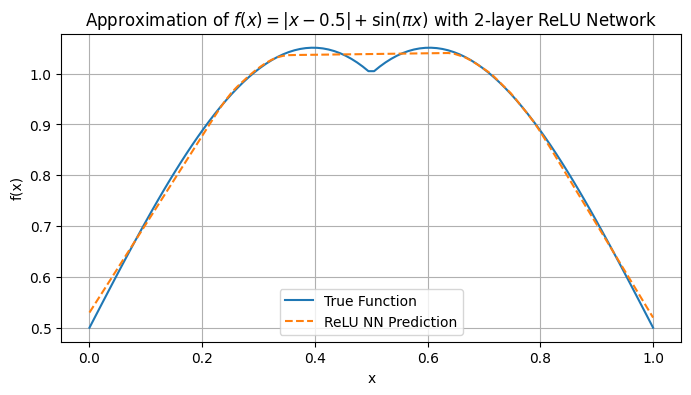

In [30]:
plt.figure(figsize=(8, 4))
plt.plot(x_test, y_test, label='True Function')
plt.plot(x_test, y_pred, label='ReLU NN Prediction', linestyle='--')
plt.legend()
plt.title("Approximation of $f(x) = |x - 0.5| + \sin(\pi x)$ with 2-layer ReLU Network")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()